In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

In [124]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

trainset_dataset = datasets.MNIST(root="./data", transform=transform, train=True, download=True)
test_dataset = datasets.MNIST(root="./data", transform=transform, train=False, download=True)

trainset_loader = DataLoader(dataset=trainset_dataset, shuffle=True, batch_size=64)
test_loader = DataLoader(dataset=test_dataset, shuffle=False, batch_size=64)

In [125]:
class MNISTNeuralNet(nn.Module):
    def __init__(self):
        super(MNISTNeuralNet, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 128)
        self.act = nn.ReLU()
        self.layer2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layer1(x)
        x = self.act(x)
        x = self.layer2(x)
        return x

In [126]:
model = MNISTNeuralNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [127]:
epochs = 5

for epoch in range(epochs):
    model.train()
    for images, labels in trainset_loader:
        optimizer.zero_grad()
        prediction = model(images)
        loss = criterion(prediction, labels)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch: {epoch + 1}/{epochs}, Loss: {loss.item():.3f}")

Epoch: 1/5, Loss: 0.419
Epoch: 2/5, Loss: 0.606
Epoch: 3/5, Loss: 0.213
Epoch: 4/5, Loss: 0.202
Epoch: 5/5, Loss: 0.140


In [128]:
model.eval()

correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        prediction = model(images)
        _, predicted = torch.max(prediction.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 92.49%


In [142]:
image_path = "./num/4_1.png"
image = Image.open(image_path)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,)), transforms.Resize((28, 28))])
image_tensor = transform(image).unsqueeze(0)

"""image, label = test_dataset[1338]
image_tensor = image"""

model.eval()
prediction = model(image_tensor)
predicted_class = torch.argmax(prediction).item()

print(f'Predicted class: {predicted_class}')

Predicted class: 4


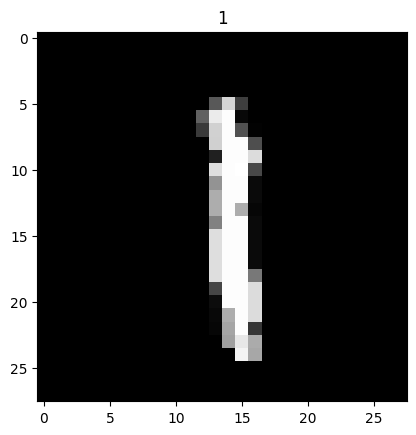

In [146]:
import matplotlib.pyplot as plt

image, label = test_dataset[1338]
image = transforms.ToPILImage()(image)
plt.imshow(image, cmap='gray')
plt.title(f"{label}")
plt.show()

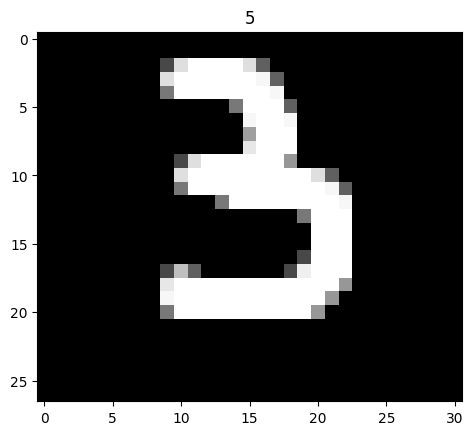

In [135]:
image = "./num/3.png"
image = Image.open(image)

transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((28, 28)), transforms.Normalize((0.5,),(0.5))])
image_tensor = transform(image)

plt.imshow(image, cmap="gray")
plt.title("5")
plt.show()